# DA Final project:

# Music & mental health
## Project 
###  Name of students:
Liad Malachi
Amit Elmaliach
Talya Plotnitzki


<a id='top'></a>

<div>
<img src="https://github.com/TalyaPlot/musicOnMental/blob/main/%D7%9E%D7%95%D7%96%D7%99%D7%A7%D7%94.jpeg?raw=true.jpg" alt="Description of image" style="width: 50%; height: auto;">
     
</div>

<a id='1'></a>

# <span style="color:#8000FF;">1. Relevant libraries</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

<a id='2'></a>

# <span style="color:#8000FF;">2. Dtypes & info</span>

#### Information on the data
The target of our project is to understand the inpact of music on mental health. <br>taken from [Kaggle](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)

Data collection was managed by @catherinerasgaitis via a Google Form. 

In [3]:
url = 'https://raw.githubusercontent.com/TalyaPlot/musicOnMental/main/mxmh_survey_results.csv'
MAMH_df = pd.read_csv(url)

In [4]:
MAMH_df.shape

(736, 33)

In [5]:
MAMH_df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [6]:
MAMH_df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


#### Noisy data

We will check if there are any anomalies in the relevant columns:

We saw that there were two missing lines at the beginning of the "music effects" column so we decided to check the rest of the column. Later we will use the data of this column.

We also decided to check the "fav genre" column because we will use it a lot later.

In [7]:
MAMH_df["Music effects"].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [8]:
MAMH_df["Fav genre"].unique()

array(['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'K pop',
       'Country', 'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal',
       'Folk', 'Lofi', 'Gospel'], dtype=object)

It can be seen that there are no outliers. There are missing values.

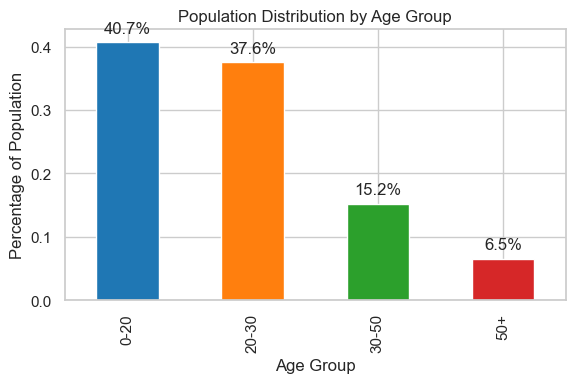

In [9]:
sns.set(style="whitegrid")
ages = MAMH_df['Age']
bins = [0, 20, 30, 50, float('inf')]
labels = ['0-20', '20-30', '30-50', '50+']
age_groups = pd.cut(ages, bins=bins, labels=labels, right=False)
population_percentage = age_groups.value_counts(normalize=True).sort_index()
population_percentage = population_percentage.dropna()
fig, ax = plt.subplots(figsize=(6, 4)) 
population_percentage.plot(kind='bar', color=plt.cm.tab10.colors, ax=ax)  
ax.set_title('Population Distribution by Age Group')
ax.set_xlabel('Age Group')  
ax.set_ylabel('Percentage of Population')  
ax.set_xticks(range(len(labels)))  
ax.set_xticklabels(labels)  
for i, v in enumerate(population_percentage):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

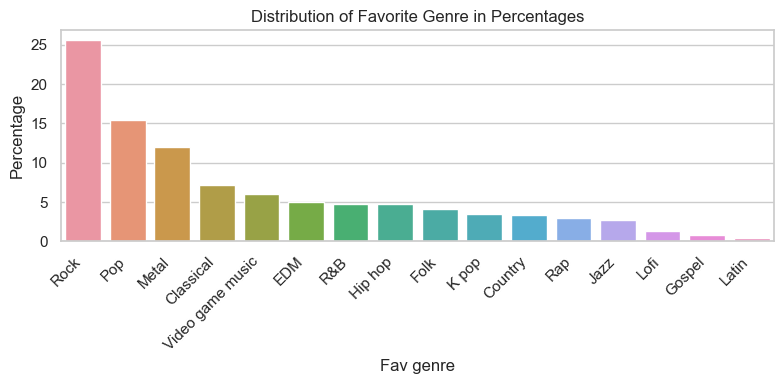

In [10]:
sns.set(style="whitegrid")

genre_order = MAMH_df['Fav genre'].value_counts().index

total = len(MAMH_df)
genre_counts = MAMH_df['Fav genre'].value_counts()
genre_percent = genre_counts / total * 100

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=genre_percent.index, y=genre_percent.values, ax=ax, order=genre_order)

ax.set_title('Distribution of Favorite Genre in Percentages')
ax.set_xlabel('Fav genre')
ax.set_ylabel('Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

It can be seen that the majority of respondents to the survey are:

1. 0-30 years old
2. Rock lovers



<a id='3'></a>

# <span style="color:#8000FF;">3. Impacts on mental health</span>

Slope for Anxiety: 0.045489209103574235
Slope for Depression: 0.11055196025534231
Slope for Insomnia: 0.14465347704970347
Slope for OCD: 0.1114292236528016


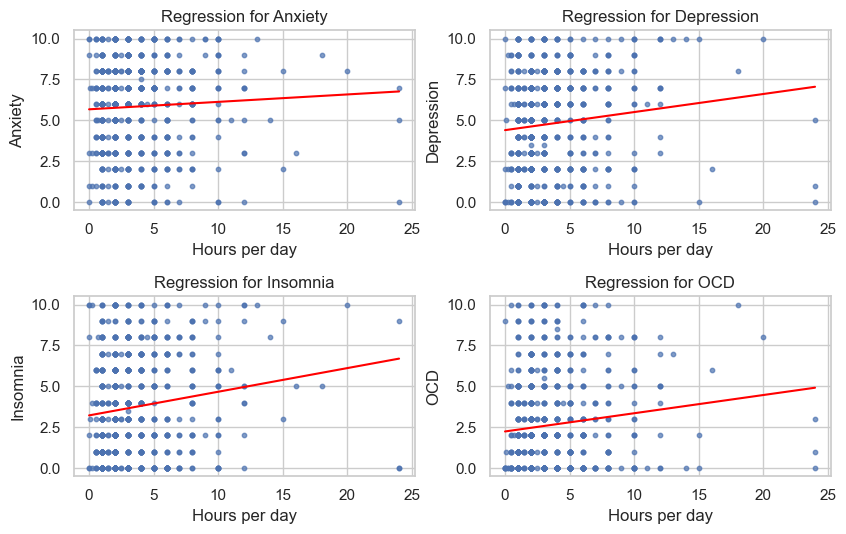

In [11]:
mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

MAMH_df['Hours per day'] = pd.to_numeric(MAMH_df['Hours per day'], errors='coerce')
MAMH_df[mental_health_columns] = MAMH_df[mental_health_columns].apply(pd.to_numeric, errors='coerce')
MAMH_df.dropna(subset=['Hours per day'] + mental_health_columns, inplace=True)

results = {}
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 5.5))
axes = axes.flatten()

for i, column in enumerate(mental_health_columns):
    X = MAMH_df[['Hours per day']]
    X = sm.add_constant(X)
    y = MAMH_df[column]
    model = sm.OLS(y, X).fit()
    results[column] = model.summary()

    axes[i].scatter(MAMH_df['Hours per day'], y, alpha=0.7, s=10)  # s=10 מקטין את גודל הנקודות

    X_pred = np.linspace(X['Hours per day'].min(), X['Hours per day'].max(), 100)
    X_pred_const = sm.add_constant(X_pred)
    y_pred = model.predict(X_pred_const)
    axes[i].plot(X_pred, y_pred, color='red', label='Regression line')

    axes[i].set_title(f'Regression for {column}')
    axes[i].set_xlabel('Hours per day')
    axes[i].set_ylabel(column)

    print(f'Slope for {column}: {model.params["Hours per day"]}')

plt.tight_layout()
plt.show()

From the graphs you can see that the highest regression slope is in insomnia. That is, as the number of hours of listening to music per day increases, one tends to suffer more of insomnia.

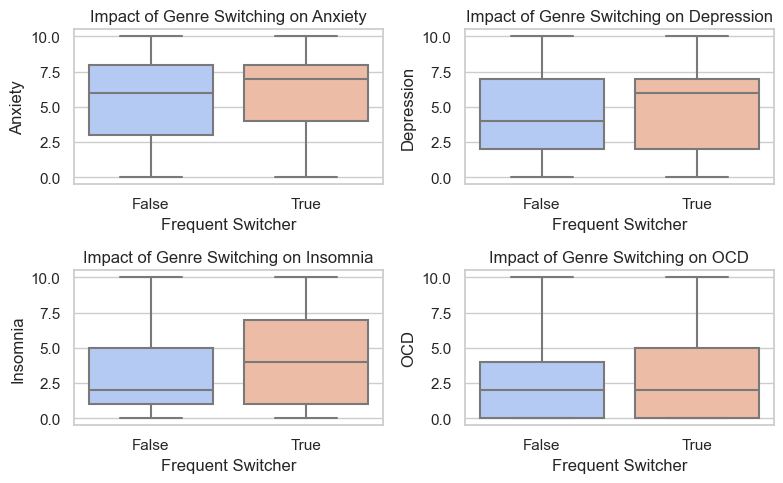

In [12]:
frequency_columns = [
    'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 
    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 
    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 
    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]'
]

MAMH_df['Genre Switching Frequency'] = MAMH_df[frequency_columns].apply(lambda x: (x == 'Very frequently').sum() + (x == 'Sometimes').sum(), axis=1)

MAMH_df['Frequent Switcher'] = MAMH_df['Genre Switching Frequency'] >= 5

plt.figure(figsize=(8, 5))
for i, column in enumerate(mental_health_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Frequent Switcher', y=column, data=MAMH_df, palette='coolwarm')
    plt.title(f'Impact of Genre Switching on {column}')
    plt.xlabel('Frequent Switcher')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

When we compare the graphs, it can be seen that people who alternate between different styles of music (at least 5 different styles), indicated that they tend to suffer more from insomnia.

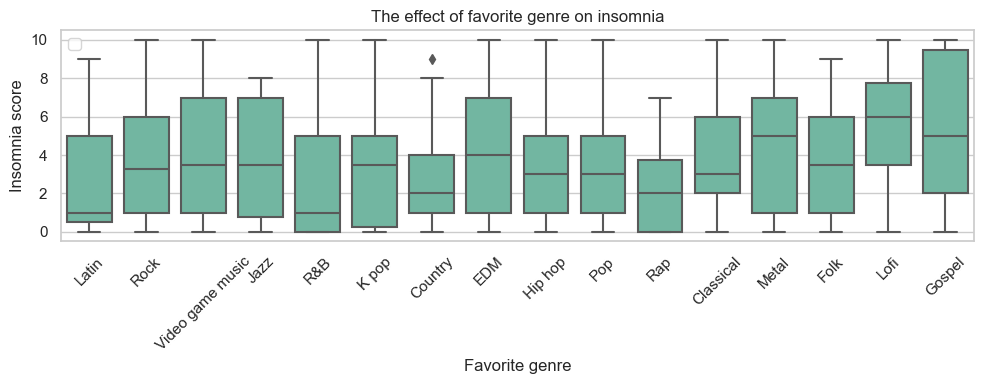

In [13]:
anxiety_depression_data = MAMH_df.melt(id_vars=['Fav genre'], value_vars=['Insomnia'], 
                                       var_name='Mental Health Issue', value_name='Score')
plt.figure(figsize=(10, 4)) 
sns.boxplot(x='Fav genre', y='Score', hue='Mental Health Issue', data=anxiety_depression_data, palette='Set2')
plt.title('The effect of favorite genre on insomnia')  
plt.xlabel('Favorite genre')  
plt.ylabel('Insomnia score')  
plt.xticks(rotation=45)  
plt.legend([])
plt.tight_layout()  
plt.show()

You can see from the graph that the people who suffer the most from insomnia are people whose favorite genre is gospel or lofi.



# <b id="section_3">  </b> <b style='color:#F05454'> Observation 1 </b> <b></b> 
---
---

Conclusion: The graphs allow us to understand the consequences of listening to a high number of hours of music, changing the music styles and choosing a preferred music style on insomnia. It can be seen that people who listen to music a high number of hours a day - indicated that they tend to have more insomnia. In addition, people who change at least 5 styles of music tend to suffer more from insomnia. Moreover, people who indicated that they like gospel and lofi music are also the people who suffer the most from insomnia compared to other music styles.

<a id='4'></a>

# <span style="color:#8000FF;">4. Differences between adults and young people</span>

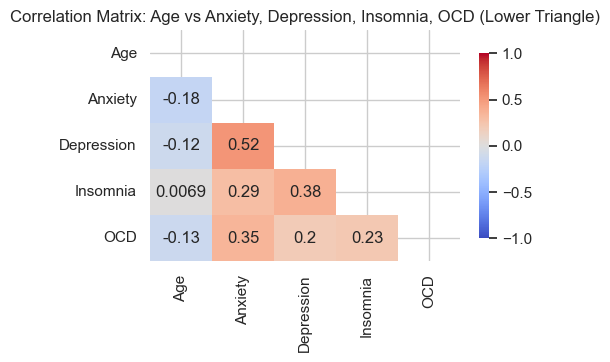

In [14]:
columns_of_interest = ["Age", "Anxiety", "Depression", "Insomnia", "OCD"]
MAMH_df[columns_of_interest] = MAMH_df[columns_of_interest].apply(pd.to_numeric, errors='coerce')
correlation_matrix = MAMH_df[columns_of_interest].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Age vs Anxiety, Depression, Insomnia, OCD (Lower Triangle)')
plt.show()

It can be seen that as age increases there is a negative correlation to mental health. That is, older people tend to suffer less from anxiety, depression and OCD.



### We decided to divide our data into 2:

1. Young people - people under the age of 30
2. Adults - people over 30 years old

In [15]:
age_above_30 = MAMH_df[MAMH_df['Age'] >= 30]
age_below_30 = MAMH_df[MAMH_df['Age'] < 30]

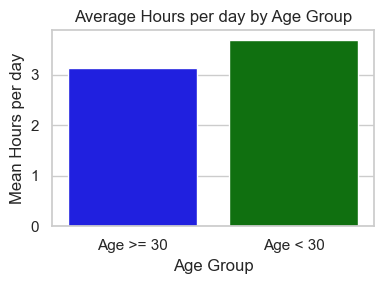

In [16]:
mean_hours_above_30 = age_above_30['Hours per day'].mean()
mean_hours_below_30 = age_below_30['Hours per day'].mean()

mean_hours_df = pd.DataFrame({
    'Age Group': ['Age >= 30', 'Age < 30'],
    'Mean Hours per day': [mean_hours_above_30, mean_hours_below_30]
})

plt.figure(figsize=(4, 3))
sns.barplot(data=mean_hours_df, x='Age Group', y='Mean Hours per day', palette=['blue', 'green'])

plt.title('Average Hours per day by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Hours per day')

plt.tight_layout()
plt.show()

It can be seen that people over the age of 30 tend to listen less to music during the day, compared to people under the age of 30.



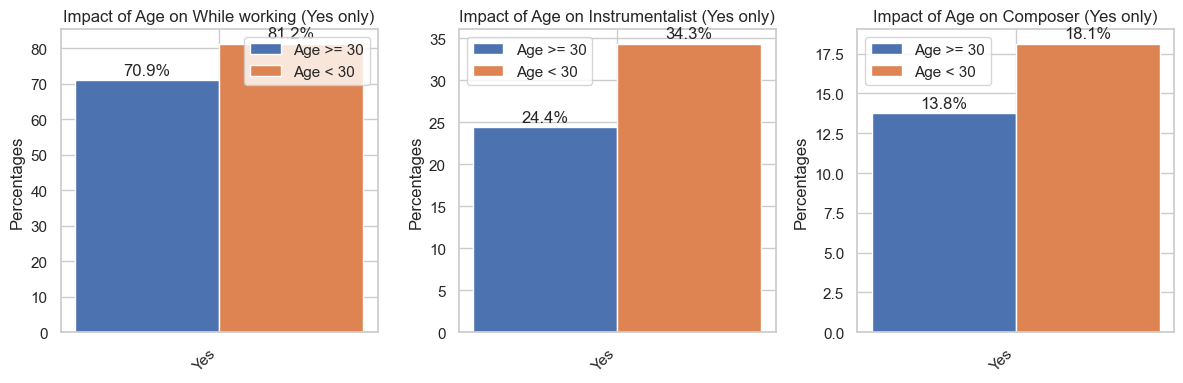

In [17]:
def calculate_category_percentages(df, column):
    percentages = df[column].value_counts(normalize=True) * 100
    return percentages

columns_to_calculate = ["While working", "Instrumentalist", "Composer"]

percentages_above_30 = {}
percentages_below_30 = {}

for col in columns_to_calculate:
    percentages_above_30[col] = calculate_category_percentages(age_above_30, col)
    percentages_below_30[col] = calculate_category_percentages(age_below_30, col)

label = "Yes"

fig, axs = plt.subplots(1, len(columns_to_calculate), figsize=(12, 4))
for i, col in enumerate(columns_to_calculate):
    ax = axs[i]
    
    above_30_value = percentages_above_30[col].get(label, 0)
    below_30_value = percentages_below_30[col].get(label, 0)
    
    x = np.arange(1) 
    width = 0.35
    
    rects1 = ax.bar(x - width/2, above_30_value, width, label='Age >= 30')
    rects2 = ax.bar(x + width/2, below_30_value, width, label='Age < 30')
    
    ax.set_ylabel('Percentages')
    ax.set_title(f'Impact of Age on {col} (Yes only)')
    ax.set_xticks(x)
    ax.set_xticklabels([label], rotation=45, ha="right")
    ax.legend()
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 2),  
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)

plt.tight_layout()
plt.show()

It can be seen that people under the age of 30 are more likely to listen to music while working, play musical instruments and compose, than adults.



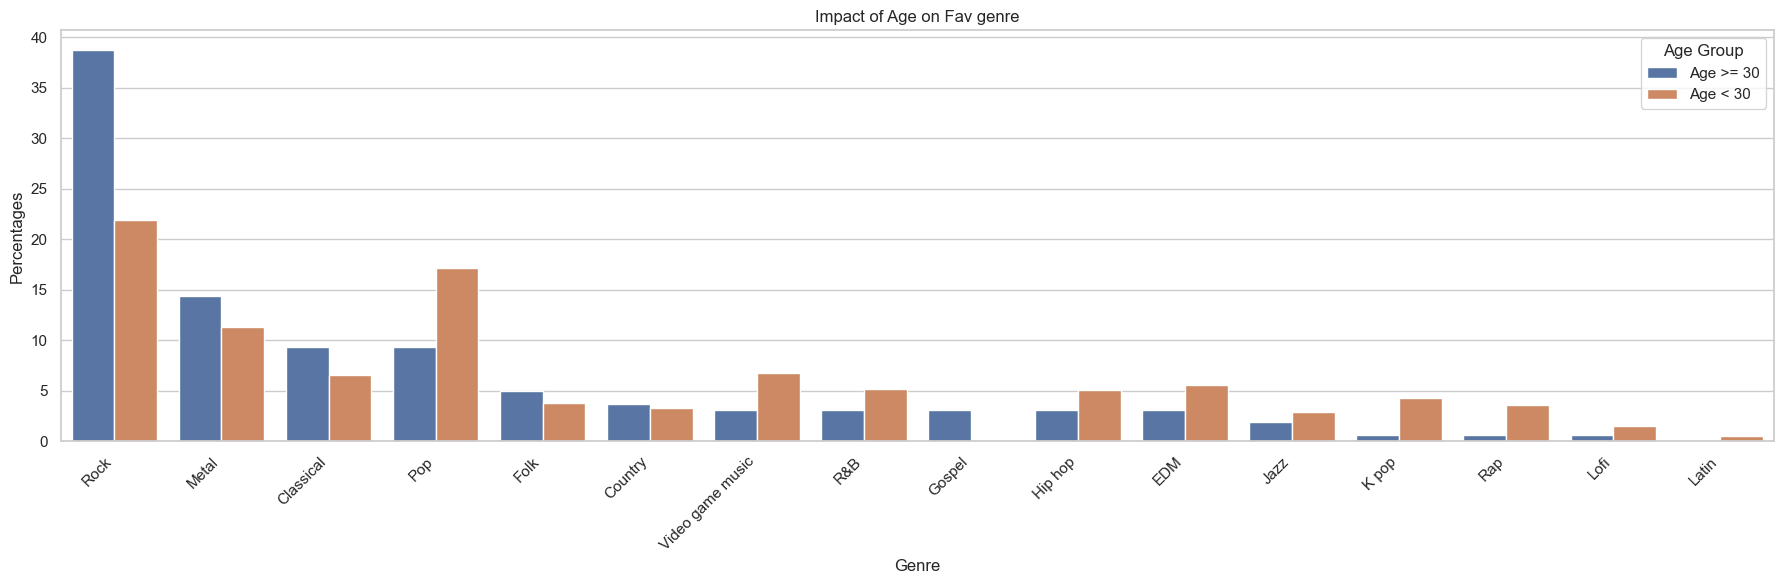

In [18]:
def calculate_category_percentages(df, column):
    percentages = df[column].value_counts(normalize=True) * 100
    return percentages

columns_to_calculate = ["Fav genre"]

percentages_above_30 = {}
percentages_below_30 = {}

for col in columns_to_calculate:
    percentages_above_30[col] = calculate_category_percentages(age_above_30, col)
    percentages_below_30[col] = calculate_category_percentages(age_below_30, col)

col = columns_to_calculate[0]  
labels = list(set(percentages_above_30[col].index).union(set(percentages_below_30[col].index)))
above_30_values = [percentages_above_30[col].get(label, 0) for label in labels]
below_30_values = [percentages_below_30[col].get(label, 0) for label in labels]

data = pd.DataFrame({
    'Genre': labels,
    'Age >= 30': above_30_values,
    'Age < 30': below_30_values
})

data = data.sort_values('Age >= 30', ascending=False)

data_melted = data.melt(id_vars='Genre', var_name='Age Group', value_name='Percentage')

plt.figure(figsize=(18, 6))
sns.barplot(x='Genre', y='Percentage', hue='Age Group', data=data_melted)
plt.title(f'Impact of Age on {col}')
plt.ylabel('Percentages')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

It can be seen that the distribution of percentages among the people under 30 is more diverse and wider. People over 30 mostly like rock music.



# <b id="section_4">  </b> <b style='color:#F05454'> Observation 2 </b> <b></b> 
---
---

Conclusion: We have seen the relationship between age and Anxiety, Depression, Insomnia, OCD - the older people are, the less likely they are to suffer from all of these. In addition, we saw that older people indicated that they listen to music less during their work, they are less likely to be instrumentalists and composers and they tend to like specific styles of music without much variety.

<a id='5'></a>

# <span style="color:#8000FF;">5. The "Music effects"</span>

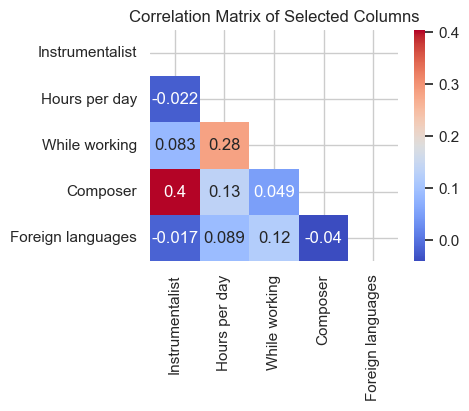

In [19]:
selected_columns = ["Instrumentalist", "Hours per day", "While working", "Composer", "Foreign languages"]
data_selected = MAMH_df[selected_columns].copy()

binary_columns = ["Instrumentalist", "While working", "Composer", "Foreign languages"]
for col in binary_columns:
    data_selected.loc[:, col] = data_selected[col].map({'Yes': 1, 'No': 0})
corr_m = data_selected.corr()

mask = np.triu(np.ones_like(corr_m, dtype=bool))

plt.figure(figsize=(4, 3))
sns.heatmap(corr_m, annot=True, mask=mask, cmap='coolwarm')  

plt.title('Correlation Matrix of Selected Columns')

plt.show()

It can be seen that there is a strong positive correlation between composer and instrumentalist. That is, people who tend to be instrumentalists also tend to compose.



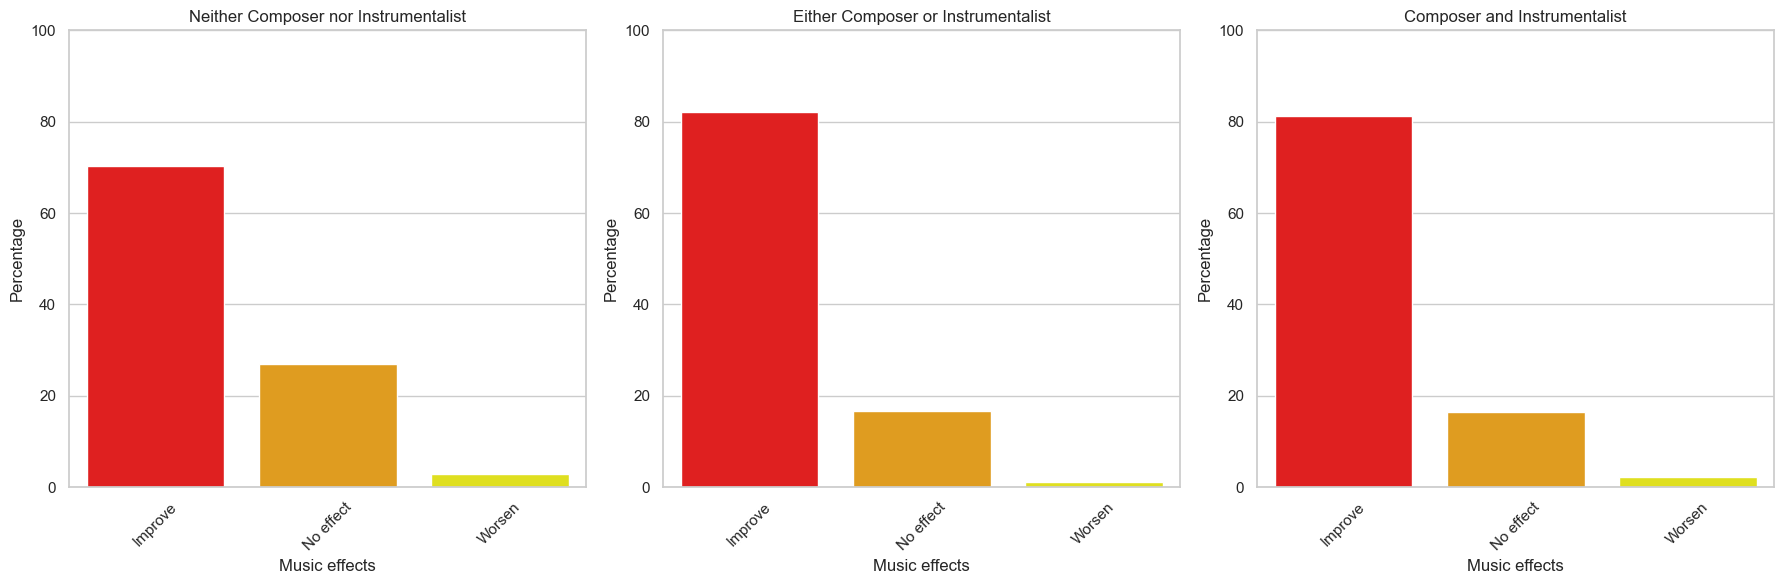

In [20]:
filtered_yes_df = MAMH_df[(MAMH_df['Instrumentalist'] == 'Yes') & (MAMH_df['Composer'] == 'Yes')]

music_effects_counts_yes = filtered_yes_df['Music effects'].value_counts(normalize=True) * 100

filtered_no_both_df = MAMH_df[(MAMH_df['Instrumentalist'] == 'No') & (MAMH_df['Composer'] == 'No')]

music_effects_counts_no_both = filtered_no_both_df['Music effects'].value_counts(normalize=True) * 100

filtered_no_either_df = MAMH_df[((MAMH_df['Instrumentalist'] == 'No') & (MAMH_df['Composer'] == 'Yes')) | ((MAMH_df['Instrumentalist'] == 'Yes') & (MAMH_df['Composer'] == 'No'))]

music_effects_counts_no_either = filtered_no_either_df['Music effects'].value_counts(normalize=True) * 100

colors = ['yellow', 'orange', 'red']
color_mapping = {effect: colors[i % len(colors)] for i, effect in enumerate(MAMH_df['Music effects'].unique())}

def plot_bar(ax, data, title):
    sns.barplot(x=data.index, y=data.values, palette=[color_mapping[effect] for effect in data.index], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Music effects')
    ax.set_ylabel('Percentage')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(0, 100)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_bar(axes[0], music_effects_counts_no_both, 'Neither Composer nor Instrumentalist')

plot_bar(axes[1], music_effects_counts_no_either, 'Either Composer or Instrumentalist')

plot_bar(axes[2], music_effects_counts_yes, 'Composer and Instrumentalist')

plt.tight_layout()
plt.show()

It can be seen that people who both play and compose have indicated that their mental state has improved for the better. But contrary to what we would think, there is not a big gap between people who indicated that they only play or only compose and those who indicated that they both play and compose. It can be seen that there is a certain gap between people who indicated that they neither play nor compose - their mental state improved much less compared to the rest.

# <b id="section_5">  </b> <b style='color:#F05454'> Observation 3 </b> <b></b> 
---
---

Conclusion: People who are involved in music (play or produce music), testify that their mental state improves due to the influence of music on their lives.

